# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read your api key environment variable
api_key = "e4c6c7d8ef714789a92504c2ee804e93"

In [4]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
from newsapi import NewsApiClient

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q= "bitcoin", language= "en", sort_by= "relevancy")
btc_articles["totalResults"]

8747

In [8]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q= "ethereum", language= "en", sort_by= "relevancy")
eth_articles["totalResults"]

3316

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)  
bitcoin_df

,text,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
4,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000
5,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000
6,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000
7,Posted \r\nBitcoin climbed to a record high on...,0.4588,0.103,0.000,0.897
8,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000
9,By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...,0.0000,0.000,0.000,1.000


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df

,text,compound,positive,negative,neutral
0,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784
1,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.000,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.000,0.907
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.000,0.903
5,Apple CEO Tim Cook said he owns cryptocurrency...,0.4019,0.076,0.000,0.924
6,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.000,0.779
7,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.000,0.792
8,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000
9,Bitcoin has lost almost 20 per cent in less th...,-0.3182,0.000,0.062,0.938


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.125040,0.04420,0.013650,0.942150
std,0.337172,0.06625,0.039723,0.068533
min,-0.680800,0.00000,0.000000,0.801000
25%,0.000000,0.00000,0.000000,0.895250
50%,0.000000,0.00000,0.000000,0.978500
75%,0.385600,0.09775,0.000000,1.000000
max,0.755800,0.19900,0.167000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.307340,0.077450,0.006200,0.916300
std,0.340277,0.078558,0.019083,0.077373
min,-0.318200,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.862750
50%,0.381550,0.074000,0.000000,0.915500
75%,0.549700,0.111750,0.000000,1.000000
max,0.822500,0.221000,0.062000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum has the highest mean positive score of 0.07745, this is 0.03325 higher than BTC's mean positive score**

Q: Which coin had the highest compound score?

A: **Ethereum has the highest compound score of 0.8225, this is 0.0667 higher than BTC's compound score**

Q. Which coin had the highest positive score?

A: **Ethereum has the highest positive score of 0.221000, this is 0.022 higher than BTC's positive score**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words("english")

# Expand the default stopwords list if necessary

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    words = [word for word in words if word not in stop_words]
    
    return root_words

In [17]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[a, similar, hoax, earlier, this, year, tied, ..."
1,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[there, a, big, new, presence, slurping, up, p..."
2,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[for, all, the, talk, of, democratizing, finan..."
3,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[in, keeping, with, a, previous, announcement,..."
4,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, of, cryptocurrency, bitcoin, ..."


In [19]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784,"[if, you, claim, ownership, someone, will, pro..."
1,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847,"[in, keeping, with, a, previous, announcement,..."
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, and, bitcoin, are, the, two, bigges..."
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, and, business, continuity, li..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('reuters', 'bitcoin'), 6),
 (('bitcoin', 'is'), 5),
 (('in', 'this'), 5),
 (('illustration', 'taken'), 5),
 (('of', 'the'), 5),
 (('cryptocurrency', 'bitcoin'), 4),
 (('the', 'virtual'), 4),
 (('this', 'picture'), 4),
 (('picture', 'illustration'), 4),
 (('representation', 'of'), 3)]

In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('of', 'the'), 3),
 (('in', 'the'), 3),
 (('of', 'it'), 3),
 (('this', 'year'), 2),
 (('a', 'website'), 2),
 (('with', 'a'), 2),
 (('litecoin', 'are'), 2),
 (('to', 'the'), 2),
 (('said', 'he'), 2),
 (('new', 'york'), 2)]

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[('a', 26),
 ('bitcoin', 24),
 ('the', 18),
 ('of', 16),
 ('on', 9),
 ('in', 9),
 ('is', 7),
 ('reuters', 7),
 ('this', 6),
 ('to', 6)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[('the', 25),
 ('a', 20),
 ('of', 19),
 ('in', 14),
 ('to', 13),
 ('bitcoin', 8),
 ('with', 7),
 ('ethereum', 7),
 ('and', 7),
 ('cryptocurrency', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
import sys
print(sys.executable)

/opt/anaconda3/envs/pyvizenv/bin/python


In [35]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::netcdf4==1.5.3=py37h28545a2_0
  - defaults/osx-64::matplotlib==3.3.4=py37hecd8cb5_0
  - defaults/osx-64::bokeh==2.3.2=py37hecd8cb5_0
  - defaults/osx-64::fastparquet==0.5.0=py37he3068b8_1
  - defaults/osx-64::datashape==0.5.4=py37hecd8cb5_1
  - defaults/osx-64::pywavelets==1.1.1=py37haf1e3a3_2
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::pyerfa==1.7.3=py37h9ed2024_0
  - defaults/osx-64::mkl_fft==1.3.0=py37h4a7008c_2
  - defaults/osx-64::scikit-image==0.18.1=py37hb2f4e1b_0
  - pyviz/noarch::holoviews==1.14.6=py_0
  - defaults/osx-64::bottleneck==1.3.2=py37hf1fa96c_1
  - defaults/osx-64::scikit-learn==0.24.1=py37hb2f4e1b_0
  - defaults/osx-64::numpy==1.20.1=py37hd6e1bb9_0
  - defaults/osx-64::numba==0.53.1=py3

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

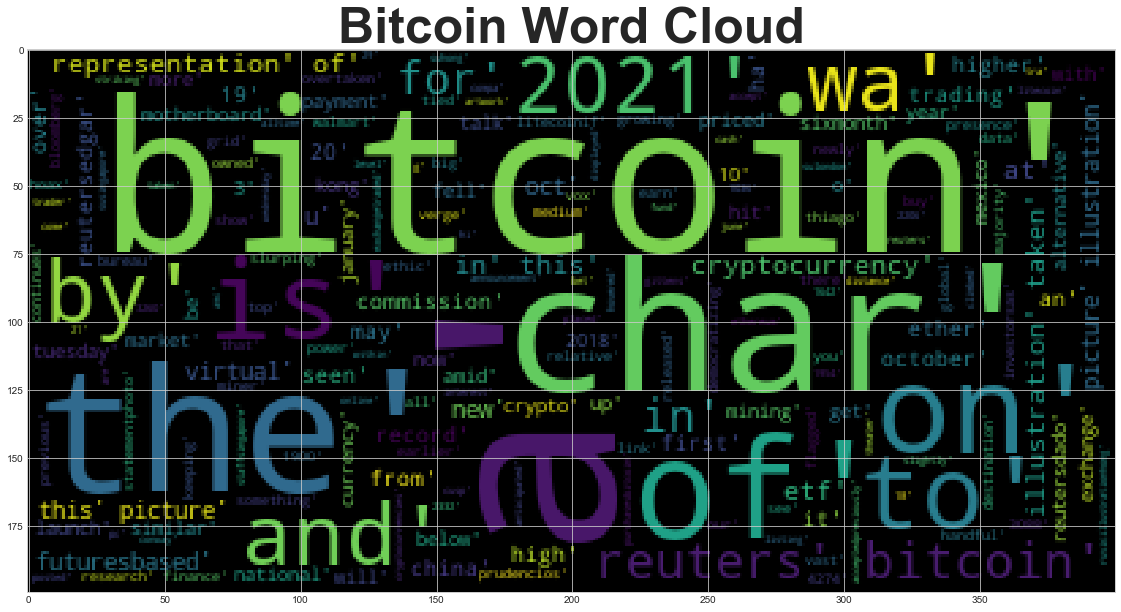

In [40]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

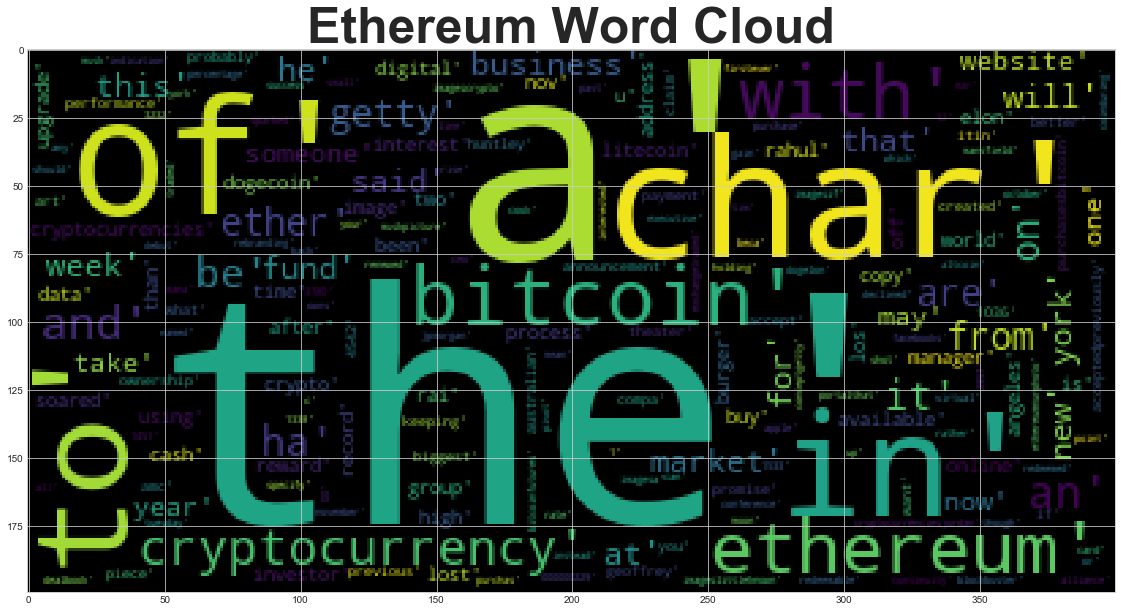

In [41]:
# Generate the Ethereum word cloud
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [44]:
pip install spacy

     |████████████████████████████████| 6.1 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 601 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 8.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
import spacy
from spacy import displacy

In [46]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 2.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ru

In [54]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [55]:
# Render the visualization
displacy.render(doc, style="ent")

In [56]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['earlier this year', 'Verge', 'Vox Media', 'Photo Illustration', 'Thiago Prudencio/S', 'U.S.', 'U.S.', 'China', 'Bloomberg', 'the National Bureau', 'AMC', 'Bitcoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/', 'IllustrationHONG KONG', 'Oct 21', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Edgar SuHONG KONG', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Bitcoin', 'October 18, 2021', 'REUTERS', 'Oct 19', 'Reuters', 'six-month', '+2332 chars]By', 'Reuters', 'SINGAPORE', 'Reuters', 'six-month', 'Tuesday', 'U.S.', 'Bitcoin 2021', 'Marco Bello/', 'The Securities and Exchange Commission', 'Valkyrie', 'ETF', 'ETF', 'NurPhoto', 'ETF', 'first', 'ETF', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', 'Baseball League', 'Perth Heat', 'first', 'Hea', 'Mexican', 'Volaris', 'Benito Juarez International Airport', 'Mexico City', 'Mexico', 'January 10, 2018', 'January 10, 2018', '68,000', 'Ether', '5k',

### Ethereum NER

In [57]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars]Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars]Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana soar

In [59]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [60]:
# Render the visualization
displacy.render(doc, style="ent")

In [61]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['this year', 'Australian Geoffrey Huntley', 'AMC', 'two', 'Jordan Mansfield', 'JPMorgan', 'beca', 'Musk', 'Getty Images', 'Elon Musk', '3,780%', 'October', 'Dogelon Mars', '0.00000229', 'November 1', '0.0', 'Getty Images', 'the past week', 'Facebook', 'Tim Cook', "The New York Times'", 'Tuesday', '1-2%', 'Ethereum', 'NurPhoto', 'Getty Images', 'first', 'Bitcoin, Ethereum', 'DogeCoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo MU', 'less than two weeks', 'Burger King', 'Robinhood', 'Royal Perks', '5', 'Getty Images', 'Ethereum', 'US', 'Rai', 'Market Neutral', 'BlockTower Capital', 'Rahul Rai', 'Crypto', 'Rahul Rai', '20', 'NFT', 'second', 'a record above $', '4,400', 'Friday', 'Ethereum', 'Bitcoin’s', 'second', 'Reuters', 'a record $6.4 billion', 'this year', 'CoinShares', 'American Airlines', 'Airbus', 'A321-200', 'Los Angeles International', 'Los Angeles', 'California', 'U.S.', 'March 28, 2018', 'REUTERS', 'Mike Blake/File PhotoNEW YORK', 'Reute', 'Thursday', '6

---